<a href="https://colab.research.google.com/github/Wakalkar/Codtech-Internship/blob/main/OPTIMIZATION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pulp



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 34.3 MB/s eta 0:00:00


In [ ]:
import pulp
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, LpStatus


In [ ]:
model = LpProblem(name="product-mix", sense=LpMaximize)


In [ ]:
x = LpVariable(name="Product_A", lowBound=0, cat='Continuous')
y = LpVariable(name="Product_B", lowBound=0, cat='Continuous')


In [ ]:
model += 20 * x + 30 * y, "Total_Profit"


In [ ]:
model += 2 * x + 1 * y <= 100, "Labor_Constraint"
model += 3 * x + 2 * y <= 120, "Material_Constraint"

In [ ]:
status = model.solve()
print(f"Status: {LpStatus[model.status]}")

Status: Optimal


In [ ]:
print(f"Optimal Units of Product A: {x.value()}")
print(f"Optimal Units of Product B: {y.value()}")
print(f"Maximum Profit: ₹{model.objective.value()}")


Optimal Units of Product A: 0.0
Optimal Units of Product B: 60.0
Maximum Profit: ₹1800.0


In [ ]:
print("🔍 Insights:")
if model.status == 1:
    print(f"To maximize profit, produce {x.value():.0f} units of Product A and {y.value():.0f} units of Product B.")
    print(f"This will yield a maximum profit of ₹{model.objective.value():.2f}")
else:
    print("The problem does not have an optimal solution.")


🔍 Insights:
To maximize profit, produce 0 units of Product A and 60 units of Product B.
This will yield a maximum profit of ₹1800.00


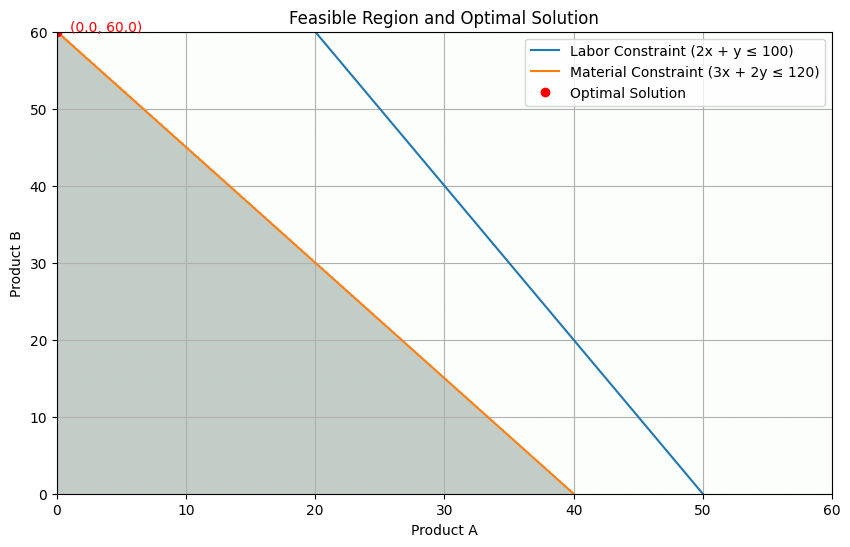

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Define range for x (Product A)
x_vals = np.linspace(0, 100, 500)

# Constraint lines
y1 = (100 - 2 * x_vals)  # Labor constraint: 2x + y <= 100 => y <= 100 - 2x
y2 = (120 - 3 * x_vals) / 2  # Material constraint: 3x + 2y <= 120 => y <= (120 - 3x)/2

# Feasible region mask
y_vals = np.linspace(0, 100, 500)
X, Y = np.meshgrid(x_vals, y_vals)
constraint1 = 2 * X + 1 * Y <= 100
constraint2 = 3 * X + 2 * Y <= 120
feasible_region = constraint1 & constraint2

# Plot constraints
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y1, label='Labor Constraint (2x + y ≤ 100)')
plt.plot(x_vals, y2, label='Material Constraint (3x + 2y ≤ 120)')
plt.fill_between(x_vals, np.minimum(y1, y2), where=(np.minimum(y1, y2) >= 0), color='lightgrey', alpha=0.5)

# Plot feasible region
plt.imshow(feasible_region, extent=(0, 100, 0, 100), origin='lower', cmap='Greens', alpha=0.3, aspect='auto')

# Plot optimal solution
plt.plot(x.value(), y.value(), 'ro', label='Optimal Solution')
plt.text(x.value()+1, y.value(), f'({x.value():.1f}, {y.value():.1f})', color='red')

# Labels and legend
plt.xlim((0, 60))
plt.ylim((0, 60))
plt.xlabel('Product A')
plt.ylabel('Product B')
plt.title('Feasible Region and Optimal Solution')
plt.legend()
plt.grid(True)
plt.show()